In [4]:
import sys
sys.path.insert(0, 'python')
from readSent import *
fhead = 'data/50SMG20165100'
sent = readfile([4,],fhead)

data/50SMG20165100auxiliaryECMWFT
data/50SMG20165100metadata.xml


In [5]:
data = sent['B04']

<matplotlib.colorbar.Colorbar instance at 0x7f4eebfe4758>

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


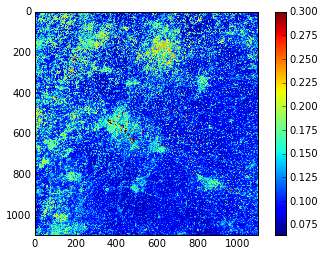

In [6]:
import pylab as plt
%matplotlib inline
plt.imshow(data[::10,::10], vmax= 0.3)
plt.colorbar()

In [ ]:
from fastRWpkl import *
a = parallel_rw_pkl(None, 'inter_sent%i'%2, 'r')
m = parallel_rw_pkl(None, 'inter_sentm%i'%2, 'r')


In [17]:
import numpy.ma as ma
mo = ma.array(a, mask=m)

In [18]:
mo=mo*0.001

<matplotlib.colorbar.Colorbar instance at 0x7f4ee99f7ef0>

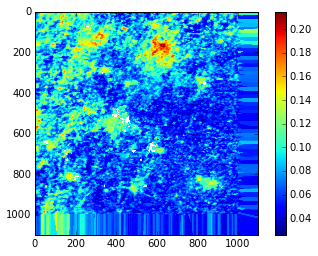

In [19]:
plt.imshow(mo[::10,::10])
plt.colorbar()

In [ ]:
modisQA = gdal.Open("m_data/MCD43A2.A2016129.h27v05.005.2016147194227.hdf").GetSubDatasets()

In [ ]:
import multiprocessing
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
import numpy.ma as ma
from readSent import *
from collections import Counter

fhead = 'data/50SMG20165100'

def shift(process):
    store = []
    for i, j in process:
        print i,j

        s1 = slice((i*1000),(i+1)*1000)
        s2 = slice((j*1000),(j+1)*1000)
        modis_cut = modis_sent[s1,s2]*0.001
        Stm_cut = Stm[s1,s2]

        modis_cut.mask[np.isnan(modis_cut)] = True
        sen_cut = Sent[s1,s2]
        ulist = np.unique(Stm_cut)
        
        
        for ii,u in enumerate(ulist):
            mask = (Stm_cut == u)
            if (mask.sum() >= 1800) and (mask.sum() < 4000):
                sx,sy = np.where(mask)
                mean = np.nanmean(sen_cut[sx, sy])
                brdf = (Counter(modis_cut[sx,sy]).most_common(1)[0][0])
                store.append([mean, brdf])
                print ii,u,mean, brdf
            else:
                pass
    return store


data = parallel_rw_pkl(None, 'inter_sent%i'%0, 'r')
mask = parallel_rw_pkl(None, 'inter_sentm%i'%0, 'r')
grid_z0 = ma.array(data, mask=mask)
sent = readfile([2,],fhead)['B02']
stm = parallel_rw_pkl(None, 'std_m', 'r')
print 'finshed reading data'
modis_sent = grid_z0
Sent = sent
Stm = stm
patches = np.array(zip(np.mgrid[0:10,0:10][0].ravel(), np.mgrid[0:10,0:10][1].ravel()))
pros = np.array(np.array_split(patches, 16))

par = partial(shift)
pool = multiprocessing.Pool(processes=16)
data = pool.map(par, pros)
pool.close()
pool.join()
parallel_rw_pkl(data, 'b2_modis', 'w')

print 'lol finished!!!!!'                                    

In [ ]:
import multiprocessing
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
import numpy.ma as ma
from readSent import *
from collections import Counter

fhead = 'data/50SMG20165100'

def shift(process):
    store = []
    for i, j in process:
        print i,j

        s1 = slice((i*1000),(i+1)*1000)
        s2 = slice((j*1000),(j+1)*1000)
        modis_cut = modis_sent[s1,s2]*0.001
        Stm_cut = Stm[s1,s2]

        modis_cut.mask[np.isnan(modis_cut)] = True
        sen_cut = Sent[s1,s2]
        ulist = np.unique(Stm_cut)
        
        
        for ii,u in enumerate(ulist):
            mask = (Stm_cut == u)
            if (mask.sum() >= 1800) and (mask.sum() < 4000):
                sx,sy = np.where(mask)
                mean = np.nanmean(sen_cut[sx, sy])
                brdf = (Counter(modis_cut[sx,sy]).most_common(1)[0][0])
                store.append([mean, brdf])
                print ii,u,mean, brdf
            else:
                pass
    return store


data = parallel_rw_pkl(None, 'inter_sent%i'%1, 'r')
mask = parallel_rw_pkl(None, 'inter_sentm%i'%1, 'r')
grid_z0 = ma.array(data, mask=mask)
sent = readfile([3,],fhead)['B03']
stm = parallel_rw_pkl(None, 'std_m', 'r')
print 'finshed reading data'
modis_sent = grid_z0
Sent = sent
Stm = stm
patches = np.array(zip(np.mgrid[0:10,0:10][0].ravel(), np.mgrid[0:10,0:10][1].ravel()))
pros = np.array(np.array_split(patches, 16))

par = partial(shift)
pool = multiprocessing.Pool(processes=16)
data = pool.map(par, pros)
pool.close()
pool.join()
parallel_rw_pkl(data, 'b3_modis', 'w')

print 'lol finished!!!!!'                                    

In [ ]:
import multiprocessing
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
import numpy.ma as ma
from readSent import *
from collections import Counter

fhead = 'data/50SMG20165100'

def shift(process):
    store = []
    for i, j in process:
        print i,j

        s1 = slice((i*1000),(i+1)*1000)
        s2 = slice((j*1000),(j+1)*1000)
        modis_cut = modis_sent[s1,s2]*0.001
        Stm_cut = Stm[s1,s2]

        modis_cut.mask[np.isnan(modis_cut)] = True
        sen_cut = Sent[s1,s2]
        ulist = np.unique(Stm_cut)
        
        
        for ii,u in enumerate(ulist):
            mask = (Stm_cut == u)
            if (mask.sum() >= 1800) and (mask.sum() < 4000):
                sx,sy = np.where(mask)
                mean = np.nanmean(sen_cut[sx, sy])
                brdf = (Counter(modis_cut[sx,sy]).most_common(1)[0][0])
                store.append([mean, brdf])
                print ii,u,mean, brdf
            else:
                pass
    return store


data = parallel_rw_pkl(None, 'inter_sent%i'%2, 'r')
mask = parallel_rw_pkl(None, 'inter_sentm%i'%2, 'r')
grid_z0 = ma.array(data, mask=mask)
sent = readfile([4,],fhead)['B04']
stm = parallel_rw_pkl(None, 'std_m', 'r')
print 'finshed reading data'
modis_sent = grid_z0
Sent = sent
Stm = stm
patches = np.array(zip(np.mgrid[0:10,0:10][0].ravel(), np.mgrid[0:10,0:10][1].ravel()))
pros = np.array(np.array_split(patches, 16))

par = partial(shift)
pool = multiprocessing.Pool(processes=16)
data = pool.map(par, pros)
pool.close()
pool.join()
parallel_rw_pkl(data, 'b4_modis', 'w')

print 'lol finished!!!!!'                                    

In [ ]:
import multiprocessing
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
import numpy.ma as ma
from readSent import *
from collections import Counter

fhead = 'data/50SMG20165100'

def shift(process):
    store = []
    for i, j in process:
        print i,j

        s1 = slice((i*1000),(i+1)*1000)
        s2 = slice((j*1000),(j+1)*1000)
        modis_cut = modis_sent[s1,s2]*0.001
        Stm_cut = Stm[s1,s2]

        modis_cut.mask[np.isnan(modis_cut)] = True
        sen_cut = Sent[s1,s2]
        ulist = np.unique(Stm_cut)
        
        
        for ii,u in enumerate(ulist):
            mask = (Stm_cut == u)
            if (mask.sum() >= 1800) and (mask.sum() < 4000):
                sx,sy = np.where(mask)
                mean = np.nanmean(sen_cut[sx, sy])
                brdf = (Counter(modis_cut[sx,sy]).most_common(1)[0][0])
                store.append([mean, brdf])
                print ii,u,mean, brdf
            else:
                pass
    return store


data = parallel_rw_pkl(None, 'inter_sent%i'%3, 'r')
mask = parallel_rw_pkl(None, 'inter_sentm%i'%3, 'r')
grid_z0 = ma.array(data, mask=mask)
sent = readfile([8,],fhead)['B08']
stm = parallel_rw_pkl(None, 'std_m', 'r')
print 'finshed reading data'
modis_sent = grid_z0
Sent = sent
Stm = stm
patches = np.array(zip(np.mgrid[0:10,0:10][0].ravel(), np.mgrid[0:10,0:10][1].ravel()))
pros = np.array(np.array_split(patches, 16))

par = partial(shift)
pool = multiprocessing.Pool(processes=16)
data = pool.map(par, pros)
pool.close()
pool.join()
parallel_rw_pkl(data, 'b8_modis', 'w')

print 'lol finished!!!!!'                                    

In [ ]:
import multiprocessing
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
import numpy.ma as ma
from readSent import *
from collections import Counter

fhead = 'data/50SMG20165100'

def shift(process):
    store = []
    for i, j in process:
        print i,j

        s1 = slice((i*1000),(i+1)*1000)
        s2 = slice((j*1000),(j+1)*1000)
        modis_cut = modis_sent[s1,s2]*0.001
        Stm_cut = Stm[s1,s2]

        modis_cut.mask[np.isnan(modis_cut)] = True
        sen_cut = Sent[s1,s2]
        ulist = np.unique(Stm_cut)
        
        
        for ii,u in enumerate(ulist):
            mask = (Stm_cut == u)
            if (mask.sum() >= 1800) and (mask.sum() < 4000):
                sx,sy = np.where(mask)
                mean = np.nanmean(sen_cut[sx, sy])
                brdf = (Counter(modis_cut[sx,sy]).most_common(1)[0][0])
                store.append([mean, brdf])
                print ii,u,mean, brdf
            else:
                pass
    return store

def ScaleExtent(data, shape): # used for unifine different array,

    re = int(shape[0]/(data.shape[0]))

    a = np.repeat(np.repeat(data, re, axis = 1), re, axis =0)
    
    if (re*(data.shape[0])-shape[0]) != 0:
        extended = np.zeros(shape)
        extended[:re*(data.shape[0]),:re*(data.shape[0])] = a
        extended[re*(data.shape[0]):,re*(data.shape[0]):] = a[re*(data.shape[0])-shape[0]:, re*(data.shape[0])-shape[0]]
        return extended
    else:
        return a

data = parallel_rw_pkl(None, 'inter_sent%i'%3, 'r')
mask = parallel_rw_pkl(None, 'inter_sentm%i'%3, 'r')
grid_z0 = ma.array(data, mask=mask)
sent = readfile([13,],fhead)['B8A']
sent = ScaleExtent(sent, (10980,10980))
stm = parallel_rw_pkl(None, 'std_m', 'r')
print 'finshed reading data'
modis_sent = grid_z0
Sent = sent
Stm = stm
patches = np.array(zip(np.mgrid[0:10,0:10][0].ravel(), np.mgrid[0:10,0:10][1].ravel()))
pros = np.array(np.array_split(patches, 16))

par = partial(shift)
pool = multiprocessing.Pool(processes=16)
data = pool.map(par, pros)
pool.close()
pool.join()
parallel_rw_pkl(data, 'b8a_modis', 'w')

print 'lol finished!!!!!'                                    

In [ ]:
import multiprocessing
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
import numpy.ma as ma
from readSent import *
from collections import Counter

fhead = 'data/50SMG20165100'

def shift(process):
    store = []
    for i, j in process:
        print i,j

        s1 = slice((i*1000),(i+1)*1000)
        s2 = slice((j*1000),(j+1)*1000)
        modis_cut = modis_sent[s1,s2]*0.001
        Stm_cut = Stm[s1,s2]

        modis_cut.mask[np.isnan(modis_cut)] = True
        sen_cut = Sent[s1,s2]
        ulist = np.unique(Stm_cut)
        
        
        for ii,u in enumerate(ulist):
            mask = (Stm_cut == u)
            if (mask.sum() >= 1800) and (mask.sum() < 4000):
                sx,sy = np.where(mask)
                mean = np.nanmean(sen_cut[sx, sy])
                brdf = (Counter(modis_cut[sx,sy]).most_common(1)[0][0])
                store.append([mean, brdf])
                print ii,u,mean, brdf
            else:
                pass
    return store

def ScaleExtent(data, shape): # used for unifine different array,

    re = int(shape[0]/(data.shape[0]))

    a = np.repeat(np.repeat(data, re, axis = 1), re, axis =0)
    
    if (re*(data.shape[0])-shape[0]) != 0:
        extended = np.zeros(shape)
        extended[:re*(data.shape[0]),:re*(data.shape[0])] = a
        extended[re*(data.shape[0]):,re*(data.shape[0]):] = a[re*(data.shape[0])-shape[0]:, re*(data.shape[0])-shape[0]]
        return extended
    else:
        return a

data = parallel_rw_pkl(None, 'inter_sent%i'%4, 'r')
mask = parallel_rw_pkl(None, 'inter_sentm%i'%4, 'r')
grid_z0 = ma.array(data, mask=mask)
sent = readfile([11,],fhead)['B11']
sent = ScaleExtent(sent, (10980,10980))
stm = parallel_rw_pkl(None, 'std_m', 'r')
print 'finshed reading data'
modis_sent = grid_z0
Sent = sent
Stm = stm
patches = np.array(zip(np.mgrid[0:10,0:10][0].ravel(), np.mgrid[0:10,0:10][1].ravel()))
pros = np.array(np.array_split(patches, 16))

par = partial(shift)
pool = multiprocessing.Pool(processes=16)
data = pool.map(par, pros)
pool.close()
pool.join()
parallel_rw_pkl(data, 'b11_modis', 'w')

print 'lol finished!!!!!'                                    

In [ ]:
import multiprocessing
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
import numpy.ma as ma
from readSent import *
from collections import Counter

fhead = 'data/50SMG20165100'

def shift(process):
    store = []
    for i, j in process:
        print i,j

        s1 = slice((i*1000),(i+1)*1000)
        s2 = slice((j*1000),(j+1)*1000)
        modis_cut = modis_sent[s1,s2]*0.001
        Stm_cut = Stm[s1,s2]

        modis_cut.mask[np.isnan(modis_cut)] = True
        sen_cut = Sent[s1,s2]
        ulist = np.unique(Stm_cut)
        
        
        for ii,u in enumerate(ulist):
            mask = (Stm_cut == u)
            if (mask.sum() >= 1800) and (mask.sum() < 4000):
                sx,sy = np.where(mask)
                mean = np.nanmean(sen_cut[sx, sy])
                brdf = (Counter(modis_cut[sx,sy]).most_common(1)[0][0])
                store.append([mean, brdf])
                print ii,u,mean, brdf
            else:
                pass
    return store

def ScaleExtent(data, shape): # used for unifine different array,

    re = int(shape[0]/(data.shape[0]))

    a = np.repeat(np.repeat(data, re, axis = 1), re, axis =0)
    
    if (re*(data.shape[0])-shape[0]) != 0:
        extended = np.zeros(shape)
        extended[:re*(data.shape[0]),:re*(data.shape[0])] = a
        extended[re*(data.shape[0]):,re*(data.shape[0]):] = a[re*(data.shape[0])-shape[0]:, re*(data.shape[0])-shape[0]]
        return extended
    else:
        return a

data = parallel_rw_pkl(None, 'inter_sent%i'%5, 'r')
mask = parallel_rw_pkl(None, 'inter_sentm%i'%5, 'r')
grid_z0 = ma.array(data, mask=mask)
sent = readfile([12,],fhead)['B12']
sent = ScaleExtent(sent, (10980,10980))
stm = parallel_rw_pkl(None, 'std_m', 'r')
print 'finshed reading data'
modis_sent = grid_z0
Sent = sent
Stm = stm
patches = np.array(zip(np.mgrid[0:10,0:10][0].ravel(), np.mgrid[0:10,0:10][1].ravel()))
pros = np.array(np.array_split(patches, 16))

par = partial(shift)
pool = multiprocessing.Pool(processes=16)
data = pool.map(par, pros)
pool.close()
pool.join()
parallel_rw_pkl(data, 'b12_modis', 'w')

print 'lol finished!!!!!'                                    